In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

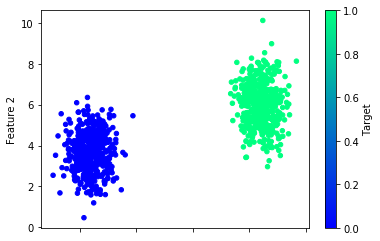

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 3s 4ms/sample - loss: 0.4465 - accuracy: 0.9453
Epoch 2/100
750/750 [==============================] - 0s 28us/sample - loss: 0.4358 - accuracy: 0.9667
Epoch 3/100
750/750 [==============================] - 0s 29us/sample - loss: 0.4255 - accuracy: 0.9680
Epoch 4/100
750/750 [==============================] - 0s 28us/sample - loss: 0.4154 - accuracy: 0.9680
Epoch 5/100
750/750 [==============================] - 0s 29us/sample - loss: 0.4058 - accuracy: 0.9693
Epoch 6/100
750/750 [==============================] - 0s 27us/sample - loss: 0.3964 - accuracy: 0.9720
Epoch 7/100
750/750 [==============================] - 0s 28us/sample - loss: 0.3873 - accuracy: 0.9733
Epoch 8/100
750/750 [==============================] - 0s 27us/sample - loss: 0.3785 - accuracy: 0.9747
Epoch 9/100
750/750 [==============================] - 0s 25us/sample - loss: 0.3701 - accuracy: 0.9760
Epoch 10/100
750/750 [======================

750/750 [==============================] - 0s 25us/sample - loss: 0.1002 - accuracy: 1.0000
Epoch 79/100
750/750 [==============================] - 0s 25us/sample - loss: 0.0986 - accuracy: 1.0000
Epoch 80/100
750/750 [==============================] - 0s 27us/sample - loss: 0.0971 - accuracy: 1.0000
Epoch 81/100
750/750 [==============================] - 0s 25us/sample - loss: 0.0957 - accuracy: 1.0000
Epoch 82/100
750/750 [==============================] - 0s 27us/sample - loss: 0.0942 - accuracy: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 28us/sample - loss: 0.0928 - accuracy: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 25us/sample - loss: 0.0914 - accuracy: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 24us/sample - loss: 0.0900 - accuracy: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 25us/sample - loss: 0.0887 - accuracy: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 24us/samp

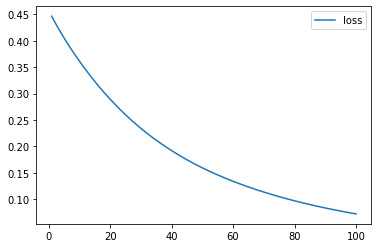

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

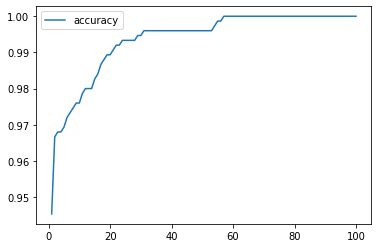

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0743 - accuracy: 1.0000
Loss: 0.07433499377965927, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

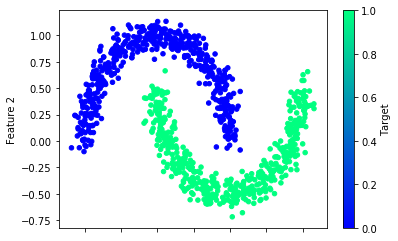

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 359us/sample - loss: 1.1754 - accuracy: 0.4800
Epoch 2/100
750/750 [==============================] - 0s 28us/sample - loss: 1.0242 - accuracy: 0.5067
Epoch 3/100
750/750 [==============================] - 0s 30us/sample - loss: 0.9273 - accuracy: 0.5213
Epoch 4/100
750/750 [==============================] - 0s 28us/sample - loss: 0.8627 - accuracy: 0.5400
Epoch 5/100
750/750 [==============================] - 0s 29us/sample - loss: 0.8150 - accuracy: 0.5493
Epoch 6/100
750/750 [==============================] - 0s 27us/sample - loss: 0.7771 - accuracy: 0.5707
Epoch 7/100
750/750 [==============================] - 0s 29us/sample - loss: 0.7463 - accuracy: 0.5827
Epoch 8/100
750/750 [==============================] - 0s 29us/sample - loss: 0.7208 - accuracy: 0.5920
Epoch 9/100
750/750 [==============================] - 0s 27us/sample - loss: 0.6984 - accuracy: 0.6040
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 27us/sample - loss: 0.2797 - accuracy: 0.8853
Epoch 79/100
750/750 [==============================] - 0s 25us/sample - loss: 0.2789 - accuracy: 0.8867
Epoch 80/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2781 - accuracy: 0.8867
Epoch 81/100
750/750 [==============================] - 0s 25us/sample - loss: 0.2774 - accuracy: 0.8853
Epoch 82/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2768 - accuracy: 0.8853
Epoch 83/100
750/750 [==============================] - 0s 26us/sample - loss: 0.2761 - accuracy: 0.8853
Epoch 84/100
750/750 [==============================] - 0s 35us/sample - loss: 0.2755 - accuracy: 0.8867
Epoch 85/100
750/750 [==============================] - 0s 31us/sample - loss: 0.2749 - accuracy: 0.8867
Epoch 86/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2743 - accuracy: 0.8853
Epoch 87/100
750/750 [==============================] - 0s 25us/samp

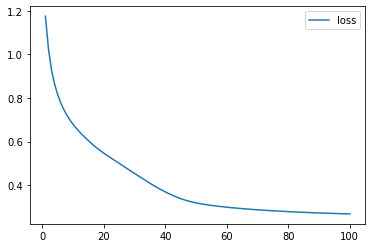

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

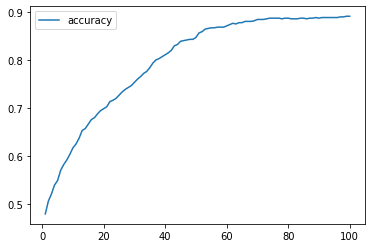

In [19]:
# Plot the loss
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 551us/sample - loss: 0.6324 - accuracy: 0.8013
Epoch 2/100
750/750 [==============================] - 0s 28us/sample - loss: 0.6014 - accuracy: 0.8133
Epoch 3/100
750/750 [==============================] - 0s 27us/sample - loss: 0.5713 - accuracy: 0.8213
Epoch 4/100
750/750 [==============================] - 0s 26us/sample - loss: 0.5421 - accuracy: 0.8333
Epoch 5/100
750/750 [==============================] - 0s 29us/sample - loss: 0.5127 - accuracy: 0.8373
Epoch 6/100
750/750 [==============================] - 0s 28us/sample - loss: 0.4845 - accuracy: 0.8480
Epoch 7/100
750/750 [==============================] - 0s 26us/sample - loss: 0.4579 - accuracy: 0.8600
Epoch 8/100
750/750 [==============================] - 0s 29us/sample - loss: 0.4331 - accuracy: 0.8533
Epoch 9/100
750/750 [==============================] - 0s 28us/sample - loss: 0.4096 - accuracy: 0.8493
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 28us/sample - loss: 0.2270 - accuracy: 0.9013
Epoch 79/100
750/750 [==============================] - 0s 25us/sample - loss: 0.2268 - accuracy: 0.9013
Epoch 80/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2264 - accuracy: 0.9013
Epoch 81/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2261 - accuracy: 0.9013
Epoch 82/100
750/750 [==============================] - 0s 28us/sample - loss: 0.2258 - accuracy: 0.9013
Epoch 83/100
750/750 [==============================] - 0s 25us/sample - loss: 0.2255 - accuracy: 0.9013
Epoch 84/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2252 - accuracy: 0.9027
Epoch 85/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2249 - accuracy: 0.9027
Epoch 86/100
750/750 [==============================] - 0s 26us/sample - loss: 0.2246 - accuracy: 0.9027
Epoch 87/100
750/750 [==============================] - 0s 27us/samp